# Convección de calor forzada: Método Explícito

<table border="1">
  <tbody>
    <tr>
      <td><img src="sol0.png" width="100"></td>
      <td><img src="sol1.png" width="100"></td>
    </tr>
    <tr>
      <td><img src="sol2.png" width="100"></td>
      <td><img src="sol3.png" width="100"></td>
    </tr>
  </tbody>
</table>

Aproximar la solución al siguiente problema usando diferencias finitas:

---
## Modelo matemático.

### Ecuación a resolver.
$$
\rho \dfrac{\partial T}{\partial t} + \nabla \cdot\left( \vec{u} T - \kappa \nabla T\right) = 0
$$

El dominio espacial de solución es $(x,y) \in [0,1] \times [0,1]$, mientras que el tiempo varía como sigue $t = 0, \dots, Nt$.

Use $\kappa = 1$ y $\rho = 1$.

---

In [1]:
# Importar bibliotecas
import numpy as np
from fdm import plot_mesh, plot_contour, plot_vector

# Definir parámetros físicos y numéricos.
Nx = 21
Ny = 21
Lx = 1.0
Ly = 1.0
hx = Lx / (Nx+1)
hy = Ly / (Ny+1)
h = hx
k = 1.0
print(hx, hy)
print(Nx, Ny)

0.045454545454545456 0.045454545454545456
21 21


### Condiciones de frontera.
- $T(0,y) = 0$ 
- $T(1,y) = 0$ 
- $T(x,0) = 0$ 
- $T(x,1) = 0$ 
    

23 23


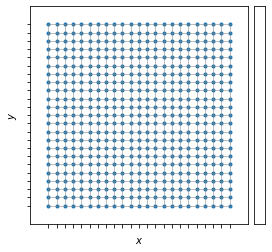

In [2]:
# Defina la malla

# Número total de nodos incluyendo las fronteras.
NxT = Nx + 2
NyT = Ny + 2

print(NxT, NyT)

# Coordenadas de la malla
xn = np.linspace(0,Lx,NxT)
yn = np.linspace(0,Ly,NyT)
xg, yg = np.meshgrid(xn, yn, indexing='ij', sparse=False)
plot_mesh(Lx, Ly, xg, yg)

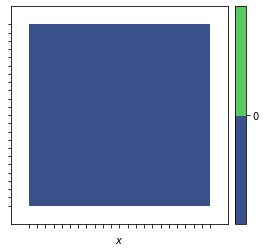

In [10]:
# Defina las condiciones de frontera sobre esa malla.

# Campo escalar sobre la malla
T = np.zeros((NxT, NyT))

# Valores en las fronteras del dominio
TL = 0.0; TR = 0.0
TB = 0.0; TT = 0.0

T[0 , :] = TL # LEFT
T[-1, :] = TR # RIGHT
T[: , 0] = TB # BOTTOM
T[: ,-1] = TT # TOP

plot_contour(Lx, Ly, xg, yg, T, ticks = [0, 1], cmap='viridis', yshared=True)

### Condición inicial.

$$
T(x,y) = \begin{cases}
\sin^2(\frac{\pi}{2}(1-\frac{r}{0.1})) & \text{Para} \,\,\, r < 0.1  \\
0 & \text{Para} \,\,\, r \geq 0.1  \\
\end{cases}
$$

con $r = \sqrt{(x-c_x)^2 + (y-c_y^2)}$ y $c = (c_x,c_y) \in (0,1)\times(0,1)$

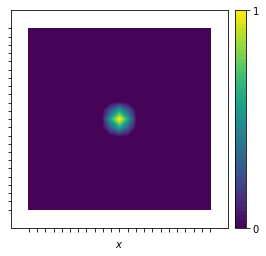

In [11]:
# Definir la condición inicial

cx = 0.5
cy = 0.5

for i in range(0, NxT):
    for j in range(0, NyT):
        r = np.sqrt( (xn[i] - cx)**2 + (yn[j] - cy)**2)
        if r < 0.1:
            T[i,j] = np.sin(0.5 * np.pi * (1 - r / 0.1) )**2
        
plot_contour(Lx, Ly, xg, yg, T, ticks = [0, 1], cmap='viridis', yshared=True)

### Velocidad.
La velocidad está dada por:

$$
u = -A \cos(\alpha_y \pi y) \sin(\alpha_x \pi x) \\
v = A \sin(\alpha_y \pi y) \cos(\alpha_x \pi x)
$$

Utilice  $A = 1.0$ y $\alpha_x = \alpha_y = 2$.

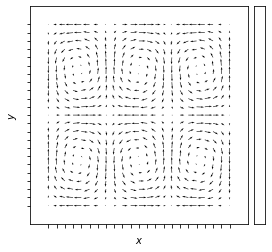

In [15]:
# Definir la velocidad
v = np.zeros((2, NxT, NyT))
A = 1.0
alpha_x = 3.0
alpha_y = 2.0
v[0] = -A * np.cos(np.pi * alpha_y * yg / Ly) * np.sin(np.pi * alpha_x * xg / Lx)
v[1] =  A * np.sin(np.pi * alpha_y * yg / Ly) * np.cos(np.pi * alpha_x * xg / Lx)

plot_vector(Lx, Ly, xg, yg, v)

In [16]:
%%time
# Método de Euler hacia atrás (implicito)
ht = 0.0001
r = k * ht / h**2
T_new = T.copy()
tolerancia = 1.0e-3 #1.0e-3
error = 1.0
error_lista = []

count = 1
while(error > tolerancia):
    
    for i in range(1,Nx+1):
        for j in range(1,Ny+1):
            T_new[i,j] = T[i,j] + r * (T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1] - 4*T[i,j])

    error = np.linalg.norm(T_new - T)
    print(count, error)
    error_lista.append(error)
    T[:] = T_new[:]
    count += 1

1 0.1242612663526447
2 0.10884761341124577
3 0.09605066774423784
4 0.08531746731321205
5 0.07623832570204121
6 0.06850159994292714
7 0.061865327381640134
8 0.05613866798593896
9 0.0511692525800528
10 0.04683423725293598
11 0.04303378386004712
12 0.039686192911536085
13 0.03672420145423774
14 0.034092126041740355
15 0.03174363275586074
16 0.029639980780081496
17 0.027748628552288317
18 0.026042120556782455
19 0.02449719324170876
20 0.02309405327704415
21 0.021815792199707293
22 0.020647909582180237
23 0.019577922978137062
24 0.018595047570105713
25 0.017689932040933207
26 0.016854439979068648
27 0.01608146830193079
28 0.015364795885910996
29 0.014698956933702236
30 0.014079134671114891
31 0.013501071808372421
32 0.012960994872611162
33 0.01245555005558361
34 0.01198174865176617
35 0.01153692050928724
36 0.01111867419657967
37 0.010724862814958559
38 0.010353554572084445
39 0.01000300738191495
40 0.009671646879932699
41 0.009358047343474403
42 0.009060915090090558
43 0.0087790739954202
4

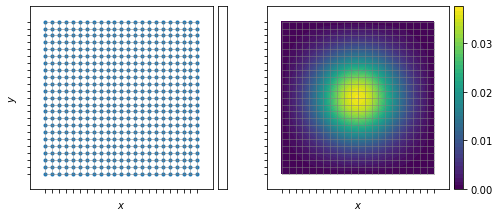

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plot_mesh(Lx, Ly, xg, yg)

plt.subplot(1,3,2)
plot_contour(Lx, Ly, xg, yg, T, ticks = [0, .01, 0.02, 0.03], 
             mesh = True, lines = 0, colors = 'white',
             cmap='viridis', yshared=True)
